# Computer vision - Week_10 - Video processing

In [3]:
import time, numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import draw
from IPython import display
from skimage import morphology
from IPython.display import Video
from skimage.color import rgb2gray
import skimage
from skimage.measure import label, regionprops
import cv2

plt.rc('font', **{'family' : 'DejaVu Sans', 'weight' : 'normal'})
plt.rcParams['font.size'] = 18

## How to work video

cv2.VideoCapture is a class in the OpenCV library that provides a convenient interface for capturing video streams, either from a video file or a live camera feed. It is commonly used in computer vision and image processing applications for tasks such as video analysis, object tracking, and real-time image processing.

**Methods**:
1. read() method:
The read() method reads the next frame from the video source.
It returns a boolean value (True if a frame is successfully read, False otherwise) and the actual frame.
Example:
`ret, frame = cap.read()`
2. get(propId) method:
The get method is used to retrieve various properties of the video capture, such as frame width, frame height, frames per second (fps), etc.
It takes a property identifier (propId) as an argument, and returns the corresponding property value.
Example:
`frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))`
3. set(propId, value) method:
The set method is used to set the value of a specific property.
It takes a property identifier (propId) and the desired value.
Example:
`cap.set(cv2.CAP_PROP_POS_FRAMES, 30)`
4. release() method:
The release() method is used to release the video capture object and close the associated video source (file or camera).


In [7]:
# Uncomment and use one of the following lines to choose the video source:

# Use a pre-recorded video file (replace "_data/traffic.mp4" with the path to your video file)
cap = cv2.VideoCapture("_data/traffic.mp4")

# Use the built-in camera (0 represents the default camera)
# cap = cv2.VideoCapture(0)

# If you're a Mac user with an iPhone, you might want to use the second camera (1 represents the second camera)
# cap = cv2.VideoCapture(1)

[ WARN:0@102.036] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2386) handleMessage OpenCV | GStreamer warning: your GStreamer installation is missing a required plugin
[ WARN:0@102.036] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2402) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module uridecodebin2 reported: Your GStreamer installation is missing a plug-in.
[ WARN:0@102.037] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (1356) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0@102.037] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_

### Get video information

List of possible info you can get from VideoCapture.

cv2.CAP_PROP_POS_MSEC: Current position of the video file in milliseconds.
cv2.CAP_PROP_POS_FRAMES: Index of the next frame to be captured.
cv2.CAP_PROP_POS_AVI_RATIO: Relative position of the video file (0 for the start, 1 for the end).
cv2.CAP_PROP_FRAME_WIDTH: Width of the frames in the video.
cv2.CAP_PROP_FRAME_HEIGHT: Height of the frames in the video.
cv2.CAP_PROP_FPS: Frames per second in the video.
cv2.CAP_PROP_FOURCC: 4-character code of codec.
cv2.CAP_PROP_FRAME_COUNT: Total number of frames in the video.
cv2.CAP_PROP_BRIGHTNESS: Brightness of the image (only for cameras).
cv2.CAP_PROP_CONTRAST: Contrast of the image (only for cameras).
cv2.CAP_PROP_SATURATION: Saturation of the image (only for cameras).
cv2.CAP_PROP_HUE: Hue of the image (only for cameras).
cv2.CAP_PROP_GAIN: Gain of the image (only for cameras).
cv2.CAP_PROP_EXPOSURE: Exposure of the image (only for cameras).

In [8]:
# Get the frame width of the video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))

# Get the frame height of the video
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Get the total number of frames in the video
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Get the frames per second (fps) of the video
fps = cap.get(cv2.CAP_PROP_FPS)

# Print the obtained video properties
print("Frame width:", frame_width)
print("Frame height:", frame_height)
print("Length (frames count):", length)
print("Frames per second:", fps)

Frame width: 160
Frame height: 120
Length (frames count): 120
Frames per second: 15.0


### Video preview
#### In jupyter notebook

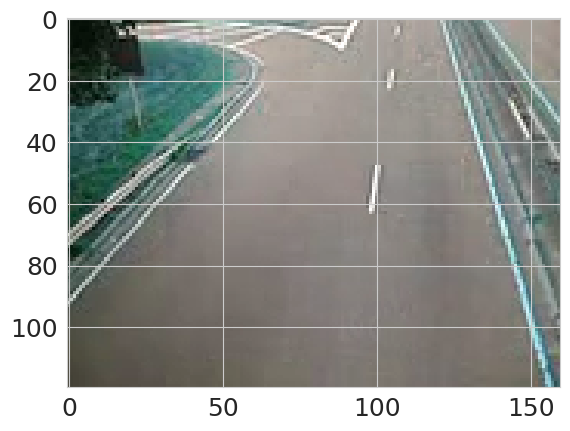

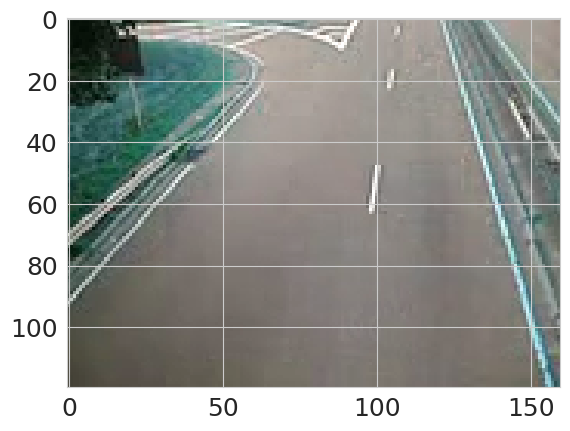

In [9]:
while cap.isOpened():
    ret, frame = cap.read()
    # If the frame is not read successfully, break the loop
    if not ret:
        break
    plt.imshow(frame)
    plt.draw()
    display.clear_output(wait= True)
    display.display(plt.gcf())
    # time.sleep(.01)


#### In OS window

In [10]:
# Check if the video capture object is successfully opened
if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

# Get the frames per second (fps) of the video
fps = cap.get(cv2.CAP_PROP_FPS)

# Create a window to display the frames
cv2.namedWindow('Video Preview', cv2.WINDOW_NORMAL)

while True:
    # Read a frame from the video
    ret, frame = cap.read()

    # If the frame is not read successfully, break the loop
    if not ret:
        break

    # Display the frame
    cv2.imshow('Video Preview', frame)

    # Exit if the 'Esc' key is pressed
    if cv2.waitKey(int(1000 / fps)) & 0xFF == 27:
        # cap.release()
        # cv2.destroyAllWSindows()
        break

# Release the video capture object and close the window
# cap.release()
cv2.destroyAllWindows()

In [11]:
# Clear Video capture
cap.release()

#### Support function for both types

In [12]:
# Add text overlay into video frame
def add_text_to_frame(frame, text, position=(30, 30), font=cv2.FONT_HERSHEY_SIMPLEX, font_scale=0.3, color=(0, 255, 0), thickness=1):
    """
    Add text to a frame.

    Parameters:
    - frame (numpy.ndarray): Input frame.
    - text (str): Text to be added to the frame.
    - position (tuple): Position of the text (x, y).
    - font (int): Font type.
    - font_scale (float): Font scale.
    - color (tuple): Text color (B, G, R).
    - thickness (int): Text thickness.

    Returns:
    - numpy.ndarray: Frame with added text.
    """
    frame_with_text = frame.copy()
    cv2.putText(frame_with_text, text, position, font, font_scale, color, thickness)
    return frame_with_text

In [13]:
def preview_video(capture_path, env='window', info=True):
    """
    Preview a video from the specified capture path.

    Parameters:
    - capture_path (str): Path to the video file.
    - env (str): Environment for preview. Possible values: 'window' or 'jupyter'.

    Returns:
    - None
    """
    # Open the video capture object
    cap = cv2.VideoCapture(capture_path)
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    print("Frame width:", frame_width)
    print("Frame height:", frame_height)
    print("Length (frames count):", length)
    print("Frames per second:", fps)

    # Check if the video capture object is successfully opened
    if not cap.isOpened():
        print("Error: Could not open video file.")
        exit()

    # Get the frames per second (fps) of the video
    fps = cap.get(cv2.CAP_PROP_FPS)

    frame_index = 0  # Variable to keep track of the current frame index

    if env == 'window':
        # Create a window to display the frames
        cv2.namedWindow('Video Preview', cv2.WINDOW_NORMAL)

        while True:
            # Read a frame from the video
            ret, frame = cap.read()

            # If the frame is not read successfully, break the loop
            if not ret:
                break
            if info:
                frame = add_text_to_frame(frame, "FRAME: {}".format(frame_index), position=(5,10))

            # Display the frame
            cv2.imshow('Video Preview', frame)


            # Increment the frame index
            frame_index += 1

            # Exit if the 'Esc' key is pressed
            if cv2.waitKey(int(1000 / fps)) & 0xFF == 27:
                break

        # Release the video capture object and close the window
        cap.release()
        cv2.destroyAllWindows()

    elif env == 'jupyter':
        while cap.isOpened():
            ret, frame = cap.read()

            # If the frame is not read successfully, break the loop
            if not ret:
                break

            # Display the frame index
            # print("Frame Index:", frame_index)
            if info:
                frame = add_text_to_frame(frame, "FRAME: {}".format(frame_index), position=(5,10))
            plt.imshow(frame)
            plt.draw()
            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(0.01)

            # Increment the frame index
            frame_index += 1

    else:
        print("Error: Invalid environment. Supported values are 'window' or 'jupyter'.")
        exit()




In [14]:
# Example usage:
# Specify the path to your video file and the desired environment ('window' or 'jupyter')
video_path = "_data/traffic.mp4"
# preview_video(0, env='window')
preview_video(video_path, env='window')

[ WARN:0@165.699] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2386) handleMessage OpenCV | GStreamer warning: your GStreamer installation is missing a required plugin
[ WARN:0@165.699] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2402) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module uridecodebin3 reported: Your GStreamer installation is missing a plug-in.
[ WARN:0@165.699] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (1356) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0@165.699] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_

Frame width: 160
Frame height: 120
Length (frames count): 120
Frames per second: 15.0


In [15]:
cap.release()

## Object detection
Introducing our image analysis solution! In this demonstration, we've crafted a powerful function designed to detect dynamic changes within images. The methodology involves subtracting frames containing objects, such as cars, from a background frame, revealing the distinct differences that represent the objects of interest.

This innovative approach is particularly useful for identifying moving objects in a video stream, providing a foundation for tasks like object tracking or anomaly detection. While the function can be applied iteratively across frames for real-time applications, this implementation example focuses on a single iteration for clarity and ease of understanding.

Unlock the potential of image differencing and witness the seamless extraction of objects from their surroundings. Dive into the realm of computer vision with our solution, where subtle variations between frames pave the way for robust object detection and analysis.
### Define specific frames

[ WARN:0@648.375] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2386) handleMessage OpenCV | GStreamer warning: your GStreamer installation is missing a required plugin
[ WARN:0@648.375] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2402) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module uridecodebin7 reported: Your GStreamer installation is missing a plug-in.
[ WARN:0@648.375] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (1356) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0@648.375] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_

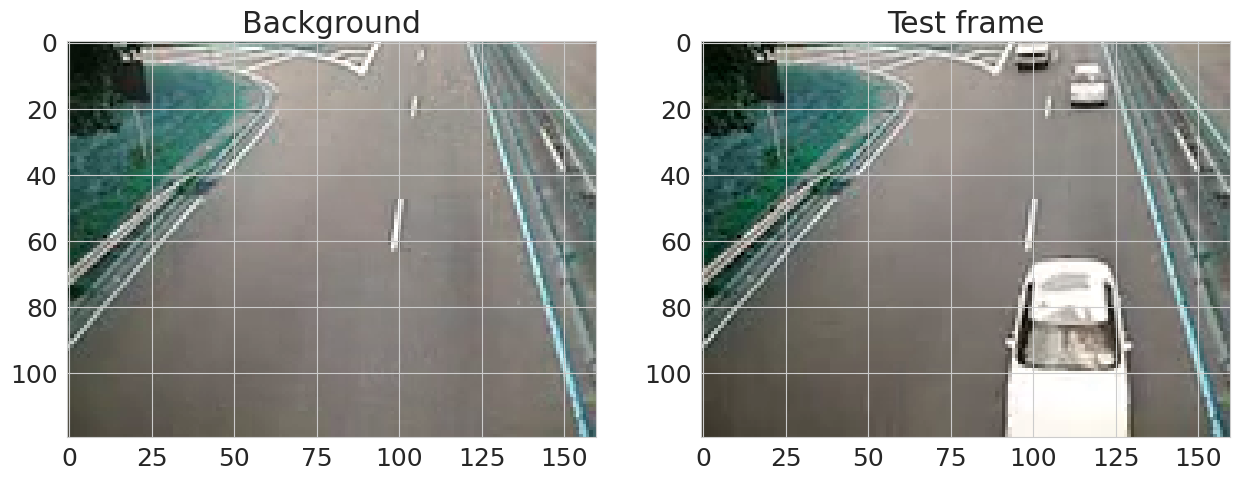

In [26]:
cap = cv2.VideoCapture("_data/traffic.mp4")

# Set the position of the video capture to frame 119 (change the frame number accordingly)
cap.set(cv2.CAP_PROP_POS_FRAMES, 119)

# Read the frame at position 119, which will be used as the background image
_, background_image = cap.read()

# Set the position of the video capture to frame 23 (change the frame number accordingly)
cap.set(cv2.CAP_PROP_POS_FRAMES, 23)

# Read the frame at position 23, which will be used as the test frame with cars
_, image_with_cars = cap.read()

# Display the background and test frames side by side using matplotlib
plt.figure(figsize=(15, 10))

# Plotting the background image
plt.subplot(121)
plt.title("Background")
plt.imshow(background_image)

# Plotting the test frame with cars
plt.subplot(122)
plt.title("Test frame")
plt.imshow(image_with_cars)

# Show the matplotlib plot
plt.show()

# Close the video capture object
cap.release()


### Frame subtraction
In this process, we embark on a journey of image analysis by calculating the difference between the current frame and the background. Taking the absolute value of this difference allows us to accentuate variations and unveil the distinct features present in the scene.

Crucially, to filter out inconsequential deviations, we employ a relatively high threshold. This strategic choice is informed by the dynamic nature of the background, which undergoes subtle changes in exposure throughout the recording. By setting a discerning threshold, we ensure that only significant differences are considered, enhancing the accuracy and relevance of our analysis.

Join us in exploring the intricacies of image differencing, where meticulous thresholding becomes a key element in isolating and highlighting meaningful changes against a dynamic backdrop. Witness the power of nuanced image processing in uncovering valuable insights within visual data.

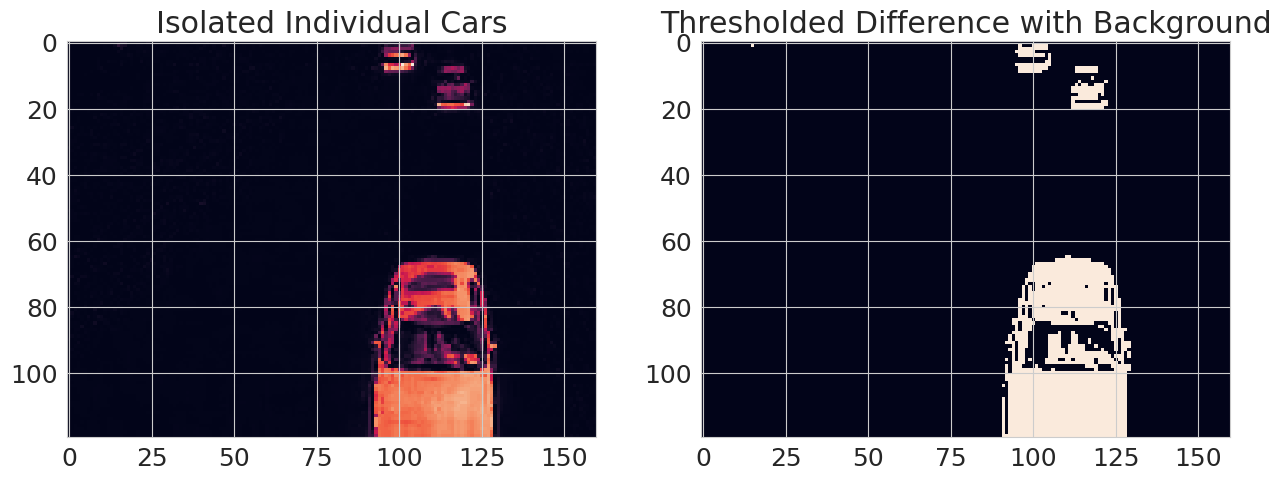

In [27]:
# Calculate the absolute difference between grayscale representations of background and image with cars
diff_image = np.abs(rgb2gray(background_image) - rgb2gray(image_with_cars))

# Threshold the difference image to create a binary mask
# Values greater than 50 are set to 255, representing significant differences
diff_thresholded = diff_image * 255 > 50

# Display the results using Matplotlib
plt.figure(figsize=(15, 10))

# Plot the thresholded difference image with a title
plt.subplot(121)
plt.title("Isolated Individual Cars")
plt.imshow(diff_image**2)

# Plot the squared difference image with a title
plt.subplot(122)
plt.title("Thresholded Difference with Background")
plt.imshow(diff_thresholded)

### Morphological "cleaning" of mask
After subtracting the background, vehicles and their shadows become noticeable. To enhance accuracy, we apply morphological operations to remove noise, fill vehicle contours, and ensure each vehicle is represented as a single connected object. Closing operations fill contours, while opening operations remove small fragments associated with a single vehicle, reducing false positives. This meticulous process refines vehicle detection, ensuring our algorithm accurately identifies and isolates vehicles in the scene.

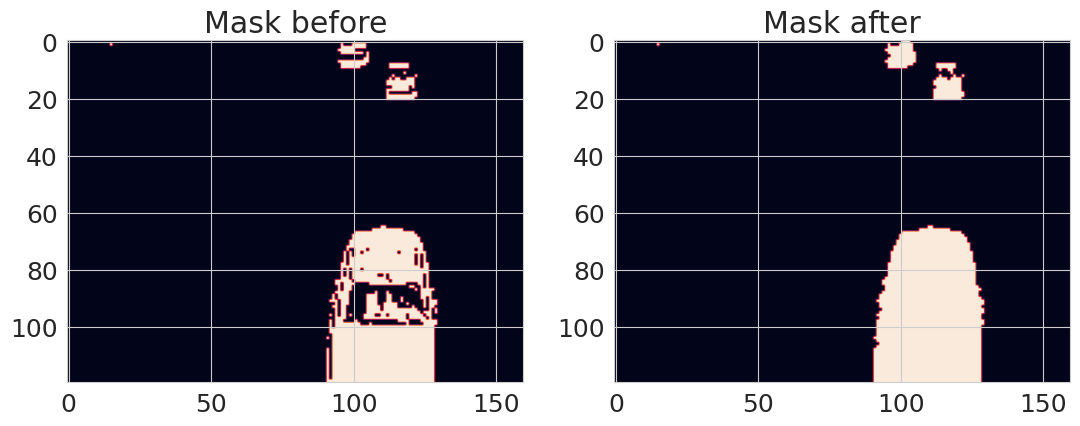

In [28]:
# Apply morphological opening to remove small fragments and holes
diff_thresholded_processed =  morphology.closing(morphology.closing(morphology.closing(morphology.remove_small_holes(diff_thresholded, area_threshold=1000))))

# Display the images before and after morphological operations
plt.figure(figsize=(20, 10))

# Plot the original thresholded difference image
plt.subplot(131)
plt.title("Mask before")
plt.imshow(diff_thresholded)

# Plot the image after morphological opening
plt.subplot(132)
plt.title("Mask after")
plt.imshow(diff_thresholded_processed)

### "Specify" mask areas
The label function, often found in image processing libraries like scikit-image, is used to identify and label connected components (regions with the same pixel value) in a binary or grayscale image. The primary purpose is to assign unique labels to distinct objects or regions within the image, facilitating subsequent analysis or measurements.

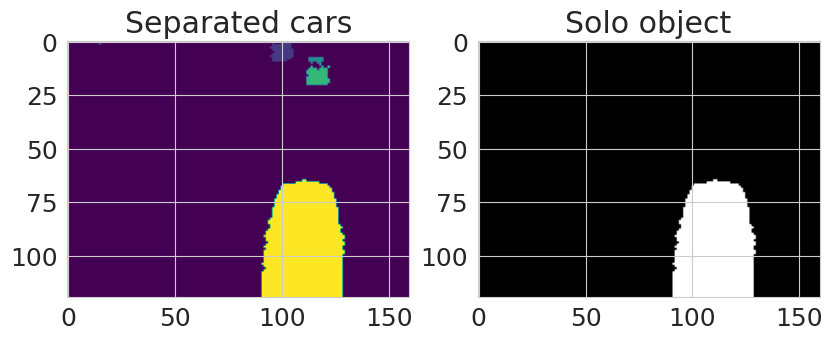

[0 1 2 3 4 5 6]


In [34]:
# Label connected components in the processed thresholded difference image
label_img = label(diff_thresholded_processed, connectivity=1.5)

# Create a binary mask for objects with ID 6 (for example), indexes are assigned randomly
selected_objects = (label_img == 6)

# Display the original thresholded difference image
plt.figure(figsize=(15, 10))

# Plot the labeled image with all objects
plt.subplot(132)
plt.title("Separated cars")
plt.imshow(label_img, cmap='viridis')

# Plot the labeled image with only objects of ID 1
plt.subplot(133)
plt.title("Solo object")
plt.imshow(selected_objects, cmap='gray')

# Show the matplotlib plot
plt.show()

# Print all indexes
print(np.unique(label_img))

### Detect and visualise centroids of cars
This code is designed to visualize and highlight the centroids of labeled regions (objects) in an image that represents cars. The code uses the regionprops function to obtain properties of labeled regions, and it iterates over these regions, filtering out those with an area (number of pixels) less than 25. For each qualifying region, a red circle is added to the plot to visually represent its centroid. This can be a helpful step in object detection and analysis, where the goal is to identify and highlight significant features, such as car centroids, within an image.

Number of cars: 3
Area index 0 | Area pixel size 84
Area index 3 | Area pixel size 81
Area index 5 | Area pixel size 1812


<Figure size 1500x1000 with 0 Axes>

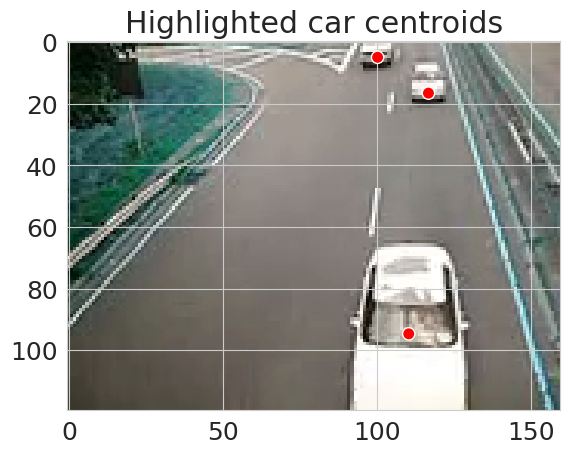

In [20]:
# Set up the figure and axis for plotting
plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(1)
ax.set_title("Highlighted car centroids")  # Set the title of the plot
ax.imshow(image_with_cars)  # Display the original image with cars

threshold_area_size = 20
# Get region properties for labeled objects in the image
regions = skimage.measure.regionprops(label_img)

filtered_regions = [region for region in regions if region.area >= threshold_area_size]
print(f"Number of cars: {len(filtered_regions)}")
# Iterate over each labeled region in the image
for index, region in enumerate(regions):
    # Filter regions based on area (number of pixels)
    if region.area >= threshold_area_size:
        # Print the area of the filtered region (for debugging or verification)
        print(f'Area index {index} | Area pixel size {region.area}')

        # Create a visualization of the centroid using a circle patch
        centroid_viz = patches.Circle((region.centroid[1], region.centroid[0]), radius=2, edgecolor='white', facecolor='red')

        # Add the centroid visualization to the plot
        ax.add_patch(centroid_viz)

# Show the matplotlib plot
plt.show()

### Implement to video

In [21]:
threshold_area_size = (50, 5000) # Create up and down threshold
cap = cv2.VideoCapture("_data/traffic.mp4")

# Set the position of the video capture to frame 119 (change the frame number accordingly)
cap.set(cv2.CAP_PROP_POS_FRAMES, 119)

# Read the frame at position 119, which will be used as the background image
_, background_image = cap.read()
background_image = rgb2gray(background_image)

cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
# Create a larger window
cv2.namedWindow('Filtered Regions', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Filtered Regions', 800, 600)  # Adjust the dimensions as needed

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Calculate the absolute difference between grayscale representations of background and image with cars
    diff_image = np.abs( background_image - rgb2gray(frame))

    # Threshold the difference image to create a binary mask
    # Values greater than 50 are set to 255, representing significant differences
    diff_thresholded = diff_image * 255 > 30

    # Apply morphological opening to remove small fragments and holes
    # diff_thresholded_processed = morphology.opening(morphology.remove_small_holes(diff_thresholded, area_threshold=64))
    diff_thresholded_processed =  morphology.closing(morphology.closing(morphology.closing(morphology.remove_small_holes(diff_thresholded, area_threshold=1000))))

    # Label connected components in the processed thresholded difference image
    label_img = label(diff_thresholded_processed, connectivity=1.5)

    # Get region properties for labeled objects in the image
    regions = skimage.measure.regionprops(label_img)

    filtered_regions = [region for region in regions if threshold_area_size[0] <= region.area < threshold_area_size[1]]

    # Draw bounding boxes around filtered regions
    for region in filtered_regions:
        # get bBox indexes
        minr, minc, maxr, maxc = region.bbox
        # get centroid indexes
        local_centroid = tuple([int(region.centroid[1]),int(region.centroid[0])])
        cv2.rectangle(frame, (minc, minr), (maxc, maxr), (0, 255, 0), 2)
        cv2.circle(frame, local_centroid , 1, (255, 0, 0), 2)
        # Add text
        frame = add_text_to_frame(frame, "CARs NUMBER: {}".format(len(filtered_regions)), position=(5,10), color=(0,0,255))


    cv2.resizeWindow('Filtered Regions', 800, 600)  # Adjust the dimensions as needed

    # Display the frame with bounding boxes
    cv2.imshow('Filtered Regions', frame)
    # if len(filtered_regions) >= 4:
    #     break
    # Break the loop if 'q' key is pressed
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break
    time.sleep(.05)

# Release the video capture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

[ WARN:0@174.808] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2386) handleMessage OpenCV | GStreamer warning: your GStreamer installation is missing a required plugin
[ WARN:0@174.808] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2402) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module uridecodebin5 reported: Your GStreamer installation is missing a plug-in.
[ WARN:0@174.808] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (1356) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0@174.808] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_

### Fine tuning :)
- Add blur for reduce noise from camera.
- Update parameters

In [22]:
threshold_area_size = (100, 5000) # up down threshold
cap = cv2.VideoCapture("_data/traffic.mp4")

# Set the position of the video capture to frame 119 (change the frame number accordingly)
cap.set(cv2.CAP_PROP_POS_FRAMES, 119)

# Read the frame at position 119, which will be used as the background image
_, background_image = cap.read()
background_image = rgb2gray(background_image)
# Apply Gaussian blur to the background image
# Apply Gaussian blur to the background image with sigmaX value
background_image = cv2.GaussianBlur(background_image, (5, 5), 0)
background_image = cv2.GaussianBlur(background_image, (5, 5), 0)
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
# Create a larger window
cv2.namedWindow('Filtered Regions', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Filtered Regions', 800, 600)  # Adjust the dimensions as needed

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # Apply Gaussian blur to the background image
    frame_gray = cv2.GaussianBlur(rgb2gray(frame), (5, 5), 0)
    frame_gray = cv2.GaussianBlur(frame_gray, (5, 5), 0)

# Calculate the absolute difference between grayscale representations of background and image with cars
    diff_image = np.abs( background_image - frame_gray)

    # Threshold the difference image to create a binary mask
    # Values greater than 50 are set to 255, representing significant differences
    diff_thresholded = diff_image * 255 > 30

    # Apply morphological opening to remove small fragments and holes
    # diff_thresholded_processed = morphology.opening(morphology.remove_small_holes(diff_thresholded, area_threshold=64))
    diff_thresholded_processed =  morphology.closing(morphology.closing(morphology.closing(morphology.closing(morphology.remove_small_holes(diff_thresholded, area_threshold=1000)))))

    # Label connected components in the processed thresholded difference image
    label_img = label(diff_thresholded_processed, connectivity=1.5)

    # Get region properties for labeled objects in the image
    regions = skimage.measure.regionprops(label_img)

    filtered_regions = [region for region in regions if threshold_area_size[0] <= region.area < threshold_area_size[1]]

    # Draw bounding boxes around filtered regions
    for region in filtered_regions:
        # get bBox indexes
        minr, minc, maxr, maxc = region.bbox
        # get centroid indexes
        local_centroid = tuple([int(region.centroid[1]),int(region.centroid[0])])
        cv2.rectangle(frame, (minc, minr), (maxc, maxr), (0, 255, 0), 2)
        cv2.circle(frame, local_centroid , 1, (255, 0, 0), 2)
        # Add text
        frame = add_text_to_frame(frame, "CARs NUMBER: {}".format(len(filtered_regions)), position=(5,10), color=(0,0,255))


    cv2.resizeWindow('Filtered Regions', 800, 600)  # Adjust the dimensions as needed

    # Display the frame with bounding boxes
    cv2.imshow('Filtered Regions', frame)
    # if len(filtered_regions) >= 4:
    #     break
    # Break the loop if 'q' key is pressed
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break
    time.sleep(.05)

# Release the video capture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

[ WARN:0@185.622] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2386) handleMessage OpenCV | GStreamer warning: your GStreamer installation is missing a required plugin
[ WARN:0@185.622] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2402) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module uridecodebin6 reported: Your GStreamer installation is missing a plug-in.
[ WARN:0@185.622] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (1356) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0@185.622] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_